 Tek değişkenli veriler, sonucun yalnızca bir değişkene bağlı olduğu veri türüdür. Örneğin, bir çizgi üzerindeki noktaların veri seti tek değişkenli bir veri olarak kabul edilebilir, burada apsis giriş özelliği olarak kabul edilebilir ve ordinat çıktı/sonuç olarak kabul edilebilir.

 Y = 2X + 3 satırı için ; Giriş özelliği X olacak ve sonuç Y olacak.

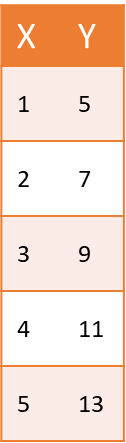

###Konsept:
```
Y = b0 + b1 * X
Burada
b0 ve b1 regresyon katsayılarıdır.
```

Bu nedenle bir model eğitilerek b0 ve b1 regresyon katsayıları tahmin edilmeye çalışılmaktadır.

###Yardımcı işlevler


1. **Tamhin Etmek**

In [27]:
def predict(x,b0,b1):
  """Tahmin değerini şuna bakarak tahmin et:
    girdi x olduğunda regresyon katsayılarını topla"""
    #Y = b0+b1 * x
  return b0+b1 * x

2. **Maliyet fonksiyonu :**
Maliyet fonksiyonu, regresyon katsayılarının mevcut değeri ile hata yüzdesini hesaplar. Modelin, en düşük hata oranına sahip gerçek regresyon katsayılarına göre ne kadar uzak olduğunu nicel olarak tanımlar.

In [28]:
def cost(x, y, b0, b1):
	# y, beklenen değerin bir listesidir
	errors = []
	for x, y in zip(x, y):
		prediction = predict(x, b0, b1)
		expected = y
		difference = prediction-expected
		errors.append(difference)
	# Şimdi, tüm gözlemler için hatalarımız var,

# bazı girdiler için hata değeri pozitif olabilir
# ve bazı girdiler için negatif olabilir,
# ve bunları doğrudan toplarsak,
# değerler iptal edilerek yanlış çıktıya neden olabilir."

# Bu nedenle, ortalama kare hatası kavramını kullanıyoruz.
# mse cinsinden, tüm hataların karelerinin ortalamasını döndürürüz.
	mse = sum([e * e for e in errors])/len(errors)
	return mse


3. **Maliyet Türevi**
Her yinelemeden sonra maliyet, hatayla orantılı olarak yükseltilir. Hatanın doğası çok veriye duyarlıdır. Veriye duyarlı derken, hata fonksiyonunda kareye sahip olduğumuz için hata değerinin çok hızlı değiştiğini kastediyorum. Bu nedenle, yüksek hata değerlerine daha toleranslı hale getirmek için hata fonksiyonunu türetiyoruz.


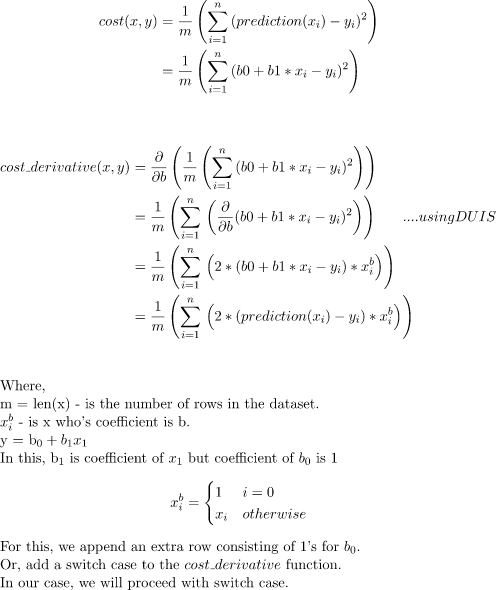

In [30]:
def cost_derivative(x,y, b0, b1, i):
  return sum([
      2*(predict(xi,b0,b1)- yi)*1
      if i == 0
      else 2*(predict(xi,b0,b1)-yi)*xi
      for xi,yi in zip(x,y)
  ])/len(x)

4. **Güncelleme Katsayıları :**
Her yinelemede (dönem), regresyon katsayısının değerleri, önceki yinelemeden gelen hataya göre belirli bir değerle güncellenir. Bu güncelleme çok önemlidir ve yazdığınız makine öğrenimi uygulamalarının en önemli noktasıdır.
Katsayıların tam olarak güncellenmesiyle katsayıların güncellenmesi, değerinin önceki değerlerinin neden olduğu bir hata payıyla cezalandırılmasıyla yapılır.
Bu kesir öğrenme oranı olarak adlandırılır. Bu, modelimizin yakınsama noktasına ne kadar hızlı ulaştığını tanımlar (hatanın ideal olarak 0 olduğu nokta).

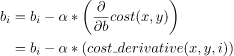

In [32]:
def update_coeff(x,y,b0,b1,i,alpha):
  bi -= alpha*cost_derivative(x,y,bo,b1,i)
  return bi

5. **Yinelemeleri Durdur:** Yinelemelerin
ne zaman durması gerektiğini belirtmek için kullanılan işlevdir.


Kullanıcıya göre, stop_iteration algoritması genellikle aşağıdaki koşullarda true değerini döndürür:

>1. Max Iteration : Model, belirtilen sayıda yineleme için eğitilir.
>2. Hata değeri : Bir önceki hatanın değerine bağlı olarak, algoritma devam edip etmeyeceğine karar verir.
>3.Doğruluk : Modelin son doğruluğuna bağlı olarak, belirtilen doğruluktan büyükse algoritma True döndürür,
>4. Hibrit : Bu daha sık kullanılır. Bu, istisnai bir mola seçeneği ile birlikte yukarıda belirtilen birden fazla koşulu birleştirir. İstisnai mola, eğitimin kötü bir şey olana kadar devam ettiği durumdur. Kötü bir şey, sonucun taşması, zaman kısıtlamalarının aşılması vb.